In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/diabetes2.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


The features 'glucose','blood pressure', 'insulin' and 'BMI' all have a minimum value of 0.This is illogical becuase these values can't be zero .Therefore ,in our circumstance,this can be safely referred to as 'missing data'. The 0 valued rows must either be removed or replaced with mean or median value for that feature.

In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

no null values

In [ ]:
print("Median of Glucose: ", df["Glucose"].median())
print("Maximum of Glucose: ", df["Glucose"].max())
print("Mean of Glucose: ", df["Glucose"].mean())

Median of Glucose:  117.0
Maximum of Glucose:  199
Mean of Glucose:  120.89453125


In [ ]:
print("Rows with Glucose value of 0: ", df[df["Glucose"] == 0].shape[0])

Rows with Glucose value of 0:  5


We observe that:

*   Median (117.0) and mean (120.8) of Glucose lie very close to each other i.e. the distribution is more or less symmetric and uniform.
*   As seen from the box plot, an outlier lies on 0-value, which I talked about earlier.
*   There are 5 rows with Glucose value as 0. This is not logical, so we need to keep this in mind.

In [ ]:
print("Median of Blood Pressure: ", df["BloodPressure"].median())
print("Maximum of Blood Pressure: ", df["BloodPressure"].max())
print("Mean of Pressure: ", df["BloodPressure"].mean())

Median of Blood Pressure:  72.0
Maximum of Blood Pressure:  122
Mean of Pressure:  69.10546875


In [ ]:
print("Rows with BloodPressure value of 0: ", df[df["BloodPressure"] == 0].shape[0])

Rows with BloodPressure value of 0:  35


We observe that:​

*   Median (72.0) and mean (69.1) of BloodPressure lie very close to each other i.e. the distribution is more or less symmetric and uniform.
*   As seen from the box plot and violin plot, some outliers lie on 0-value, which I talked about earlier.
*   There are 35 rows with BloodPressure value as 0. This is not logical.

In [ ]:
print("Rows with Insulin value of 0: ", df[df["Insulin"] == 0].shape[0])

Rows with Insulin value of 0:  374


The plots for Insulin are highly skewed. Also, the 0-value logical error is the most for this feature. 374 out of 768 instances have value of Insulin as 0.

In [ ]:
print("Median of BMI: ", df["BMI"].median())
print("Maximum of BMI: ", df["BMI"].max())
print("Mean of BMI: ", df["BMI"].mean())

Median of BMI:  32.0
Maximum of BMI:  67.1
Mean of BMI:  31.992578124999998


In [ ]:
print("Rows with BMI value of 0: ", df[df["BMI"] == 0].shape[0])

Rows with BMI value of 0:  11


We observe that:

*   Median (32.0) and Mean (31.9) of BMI are very close to each other. Thus, the distribution is more or less symmetric and uniform
*   Maximum BMI is 67.1
*   There are 11 rows with BMI value as 0

In [ ]:
print("Median of DiabetesPedigreeFunction: ", df["DiabetesPedigreeFunction"].median())
print("Maximum of DiabetesPedigreeFunction: ", df["DiabetesPedigreeFunction"].max())
print("Mean of DiabetesPedigreeFunction: ", df["DiabetesPedigreeFunction"].mean())

Median of DiabetesPedigreeFunction:  0.3725
Maximum of DiabetesPedigreeFunction:  2.42
Mean of DiabetesPedigreeFunction:  0.47187630208333325


We again observe that:

*   The distribution of Age is skewed on the left side.
*   There are some outliers in the Box plot for Age.

**Fill missing Values**

We will replace the 0-values of the following columns with their median values:

1.  Glucose
2.  BloodPressure
3.  SkinThickness
4.  Insulin
5.  BMI

In [ ]:
# first copy the original dataframe into a new pandas dataframe
df_cp = df.copy()
# now fill the missing values with the median value of the particular columns
df_cp['Glucose'] = df['Glucose'].replace(0, df['Glucose'].median())
df_cp['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].median())
df_cp['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].median())
df_cp['Insulin'] = df['Insulin'].replace(0, df['Insulin'].median())
df_cp['BMI'] = df['BMI'].replace(0, df['BMI'].median())

In [ ]:
df_cp.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


With this, we replaced all the missing values with the median (of that column) in the Training set and used those learned medians to replace the missing values in the Testing set.

In [ ]:
df_cp['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

0 --> Non-Diabetic

1 --> Diabetic

In [ ]:
df_cp.groupby('Outcome').count()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,500,500,500,500,500,500,500,500
1,268,268,268,268,268,268,268,268


In [ ]:
# separating the data and labels
X = df_cp.drop(columns = 'Outcome', axis=1)
Y = df_cp['Outcome']

In [ ]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,30.5,33.6,0.627,50
1,1,85,66,29,30.5,26.6,0.351,31
2,8,183,64,23,30.5,23.3,0.672,32
3,1,89,66,23,94.0,28.1,0.167,21
4,0,137,40,35,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63
764,2,122,70,27,30.5,36.8,0.340,27
765,5,121,72,23,112.0,26.2,0.245,30
766,1,126,60,23,30.5,30.1,0.349,47


In [ ]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

**Data Standardization**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
scaler.fit(X)

StandardScaler()

In [ ]:
standardized_data=scaler.transform(X)

In [ ]:
standardized_data

array([[ 0.63994726,  0.86604475, -0.03198993, ...,  0.16724016,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20506583, -0.5283186 , ..., -0.85155088,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01666174, -0.69376149, ..., -1.33183808,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02157407, -0.03198993, ..., -0.90976751,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14279979, -1.02464727, ..., -0.34215536,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94206766, -0.19743282, ..., -0.29849289,
        -0.47378505, -0.87137393]])

In [ ]:
X=standardized_data
Y=df_cp['Outcome']

In [ ]:
X

array([[ 0.63994726,  0.86604475, -0.03198993, ...,  0.16724016,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20506583, -0.5283186 , ..., -0.85155088,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01666174, -0.69376149, ..., -1.33183808,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02157407, -0.03198993, ..., -0.90976751,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14279979, -1.02464727, ..., -0.34215536,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94206766, -0.19743282, ..., -0.29849289,
        -0.47378505, -0.87137393]])

In [ ]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

# **Handling Imbalanced data**

**Random** **Oversampling**

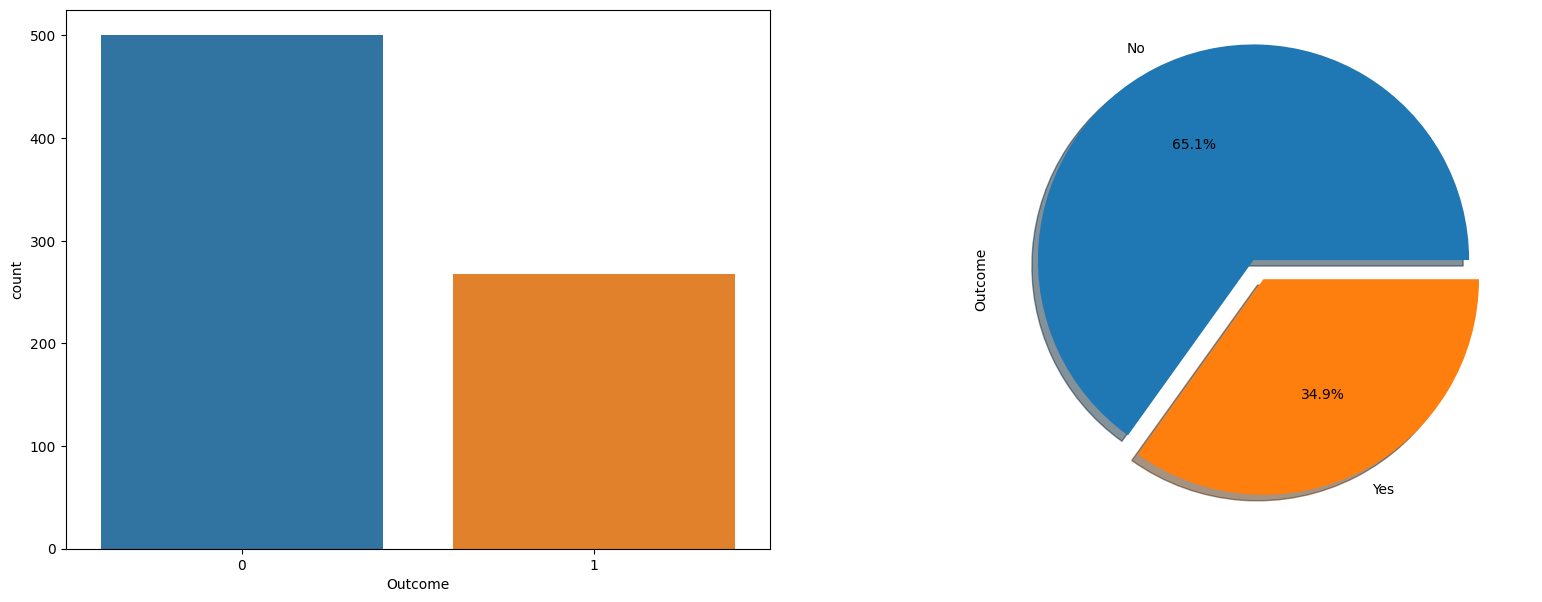

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 7))

sns.countplot(data=df_cp, x="Outcome", ax=ax[0])
df_cp["Outcome"].value_counts().plot.pie(explode=[0.1, 0],autopct="%1.1f%%", labels=["No", "Yes"], shadow=True, ax=ax[1])

plt.show()

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(sampling_strategy="not majority")
XX , YY = ros.fit_resample(X,Y)

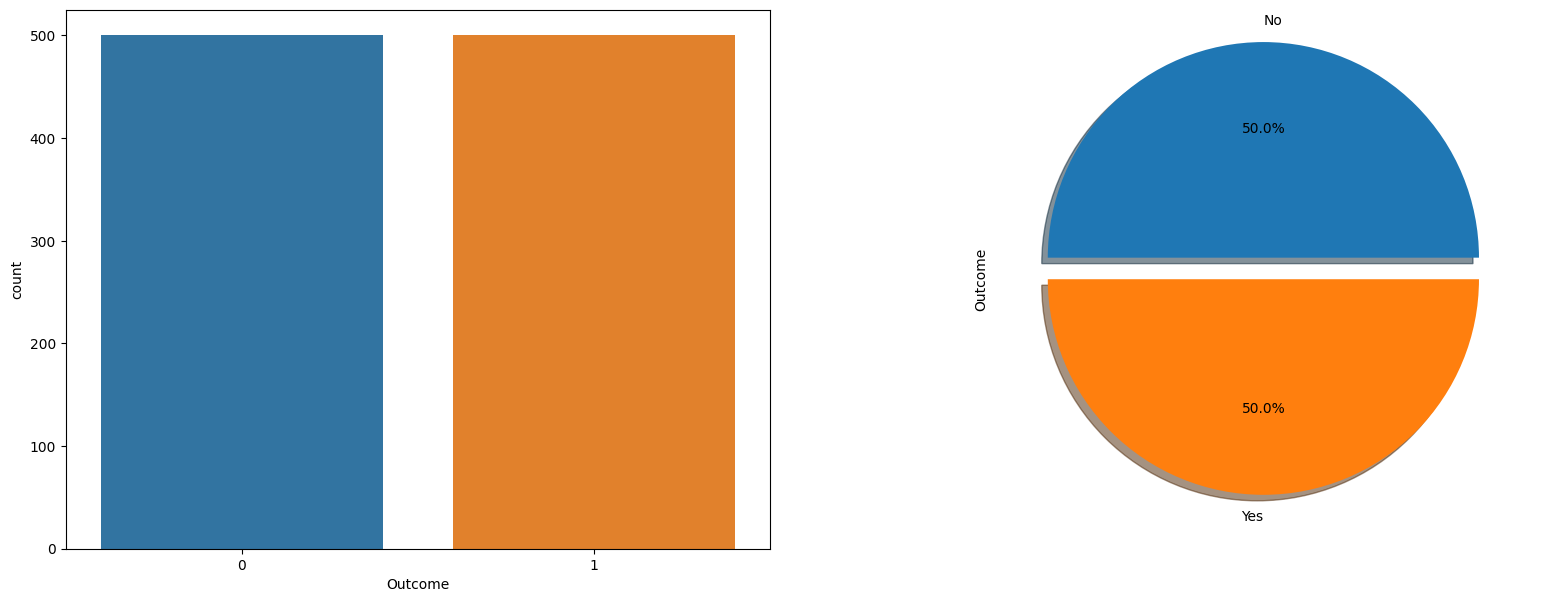

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 7))

sns.countplot(data=df_cp, x=YY, ax=ax[0])
YY.value_counts().plot.pie(explode=[0.1, 0],autopct="%1.1f%%", labels=["No", "Yes"], shadow=True, ax=ax[1])

plt.show()